In [1]:
# food prices in ukraine
import pandas as pd
import s3fs
import os
s3_url = "https://" + os.environ["AWS_S3_ENDPOINT"]
conn = s3fs.S3FileSystem(client_kwargs={'endpoint_url': s3_url})
bucket = "projet-hackathon-un-2022/drive/ Rise of food and energy prices/Food prices/"



In [4]:
path2data = bucket + "wfp_food_prices_ukr(1).csv"
with conn.open(path2data, mode="rb") as file_in:
    food_p_ukr = pd.read_csv(file_in, error_bad_lines=False, sep=",")

/tmp/ipykernel_553/852208829.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  food_p_ukr = pd.read_csv(file_in, error_bad_lines=False, sep=",")
/tmp/ipykernel_553/852208829.py:3: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  food_p_ukr = pd.read_csv(file_in, error_bad_lines=False, sep=",")


In [5]:
food_p_ukr.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2014-03-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Bread (rye),Loaf,actual,Retail,UAH,4.96,0.135
2,2014-03-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Bread (wheat),Loaf,actual,Retail,UAH,4.84,0.1318
3,2014-03-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Buckwheat grits,KG,actual,Retail,UAH,7.44,0.2026
4,2014-03-15,NaN,NaN,National Average,NaN,NaN,cereals and tubers,Potatoes,KG,actual,Retail,UAH,6.74,0.1835


In [6]:
food_p_ukr = food_p_ukr.iloc[1:,:]

In [7]:
food_p_ukr["date"].head()

1    2014-03-15
2    2014-03-15
3    2014-03-15
4    2014-03-15
5    2014-03-15
Name: date, dtype: object

In [8]:
food_p_ukr["year"] = pd.to_datetime(food_p_ukr.loc[:,"date"])

In [9]:
food_p_ukr["year"] = food_p_ukr["year"].dt.year

In [10]:
food_p_ukr["year"].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [11]:
food_p_ukr2 = food_p_ukr.loc[food_p_ukr["year"].isin([2018, 2019, 2020, 2021, 2022]),:]

In [12]:
food_p_ukr2.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year
26856,2018-12-15,Cherkaska,Cherkaska,Cherkasy,49.444433,32.0597669999999,cereals and tubers,Barley,KG,actual,Retail,UAH,11.18,0.3044,2018
26857,2018-12-15,Cherkaska,Cherkaska,Cherkasy,49.444433,32.0597669999999,cereals and tubers,Bread (high grade flour),KG,actual,Retail,UAH,21.84,0.5946,2018
26858,2018-12-15,Cherkaska,Cherkaska,Cherkasy,49.444433,32.0597669999999,cereals and tubers,Bread (rye),KG,actual,Retail,UAH,19.35,0.5268,2018
26859,2018-12-15,Cherkaska,Cherkaska,Cherkasy,49.444433,32.0597669999999,cereals and tubers,Bread (wheat),500 G,actual,Retail,UAH,11.71,0.3188,2018
26860,2018-12-15,Cherkaska,Cherkaska,Cherkasy,49.444433,32.0597669999999,cereals and tubers,Buckwheat,KG,actual,Retail,UAH,15.97,0.4348,2018


In [13]:
food_p_ukr2["commodity"].unique()

array(['Barley', 'Bread (high grade flour)', 'Bread (rye)',
       'Bread (wheat)', 'Buckwheat', 'Millet', 'Pasta', 'Potatoes',
       'Rice', 'Semolina', 'Wheat flour', 'Eggs', 'Fish (frozen)',
       'Meat (beef)', 'Meat (chicken, fillet)', 'Meat (chicken, whole)',
       'Meat (mixed, sausage)', 'Meat (pork)', 'Curd', 'Milk',
       'Sour cream', 'Sugar', 'Antibiotics (imported)',
       'Antipyretic (imported)', 'Antipyretic (local)', 'Fuel (LPG)',
       'Fuel (diesel)', 'Fuel (petrol-gasoline, 92 octane)',
       'Fuel (petrol-gasoline, 95 octane)', 'Transport (public)',
       'Vasodilating agents (imported)', 'Vasodilating agents (local)',
       'Butter', 'Oil (sunflower)', 'Apples', 'Beetroots', 'Cabbage',
       'Carrots', 'Onions', 'Bread (first grade flour)',
       'Antibiotics (local)', 'Fat (salo)'], dtype=object)

In [14]:
food_p_ukr3 = food_p_ukr2.loc[food_p_ukr2["commodity"].isin(['Barley', 'Bread (high grade flour)', 'Bread (rye)',
       'Bread (wheat)', 'Buckwheat', 'Millet', 'Pasta', 
       'Rice', 'Semolina', 'Wheat flour', 'Bread (first grade flour)']), :]

In [15]:
food_p_ukr3.shape

(11606, 15)

In [16]:
food_p_ukr3 = food_p_ukr3.copy()

In [17]:
food_p_ukr3["month"] =  pd.to_datetime(food_p_ukr3["date"]).dt.month

In [18]:
food_p_ukr3["month"].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [36]:
# food_p_ukr3 = food_p_ukr3.loc[food_p_ukr3["month"] == 4,:]

In [19]:
food_p_ukr3["market"].unique()

array(['Cherkasy', 'Chernihiv', 'Chernivtsi', 'Dnipropetrovsk', 'Donetsk',
       'Iv.-Frankivsk', 'Kharkiv', 'Kherson', 'Khmelnytskiy',
       'Kirovohrad', 'Kyiv', 'Kyiv city', 'Luhansk', 'Lviv', 'Mykolayiv',
       'Odesa', 'Poltava', 'Rivne', 'Sumy', 'Ternopyl', 'Vinnytsya',
       'Volyn', 'Zakarpattya', 'Zaporizhzhya', 'Zhytomyr'], dtype=object)

In [32]:
food_p_ukr4 = food_p_ukr3.loc[food_p_ukr3["market"] =='Odesa', :]

In [38]:
food_p_ukr4.loc[food_p_ukr4["commodity"] == "Buckwheat",:].head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month
27443,2018-12-15,Odeska,Odeska,Odesa,46.482526,30.7233095,cereals and tubers,Buckwheat,KG,actual,Retail,UAH,16.42,0.447,2018,12
28421,2019-01-15,Odeska,Odeska,Odesa,46.482526,30.7233095,cereals and tubers,Buckwheat,KG,actual,Retail,UAH,16.39,0.4462,2019,1
29378,2019-02-15,Odeska,Odeska,Odesa,46.482526,30.7233095,cereals and tubers,Buckwheat,KG,actual,Retail,UAH,16.83,0.4582,2019,2
30343,2019-03-15,Odeska,Odeska,Odesa,46.482526,30.7233095,cereals and tubers,Buckwheat,KG,actual,Retail,UAH,16.93,0.4609,2019,3
31310,2019-04-15,Odeska,Odeska,Odesa,46.482526,30.7233095,cereals and tubers,Buckwheat,KG,actual,Retail,UAH,16.79,0.4571,2019,4


In [41]:
import seaborn as sns
dataforplot = food_p_ukr4.loc[food_p_ukr4["commodity"] == 'Wheat flour',:].copy()
dataforplot["price"] = dataforplot["price"].astype(float)

<AxesSubplot: xlabel='date', ylabel='price'>

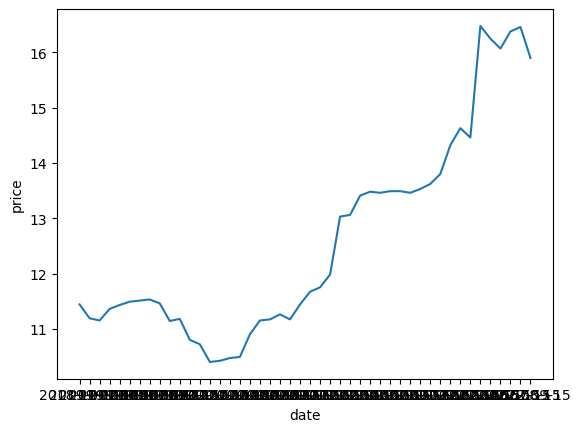

In [42]:
sns.lineplot(data=dataforplot, x="date", y="price")